# Group 8: Project Milestone 1
## Predicting Online Shopper Intention

**Contributors**

* Calvin Choi
* Nour Abdelfattah
* Sai Pusuluri
* Sana Shams

## Summary

**Question**: Using all variables provided in the dataset, which group of explanatory variables form the best prediction for the user's purchase intent?

E-commerce pages host several customers at any given moment, yet its metric of success lies in the visitors who ultimately make purchase. This project uses several machine learning models to learn from webpage data and customer browsing behaviour in order to predict whether or not a given customer will finalize their purchase.

**Findings** 

To use *all variables* that were explanatory for our target feature, Revenue, it was found that RandomForestClassifier performed the best when it came to fit time, score time, and overall prediction score. 

From the Random Forests model, it was found that the following group of explanatory variables form the best prediction for the user's purchase intent:
* PageValues
* ProductRelated_Duration 
* ExitRates
* ProductRelated
* Administrative_Duration

**Limitations**

When examining metrics such as precision, accuracy, recall and f1 score, the values were somewhat low, indicating that the random forest model's performance on the test set was not as good as its performance on the training set. This is indicative of the issue of class balance, as well as potential overfitting on the training set leading to poor generalization on unseen data.

# Introduction

It's been no surprise that retail giants like Walmart and Ikea have aggressively invested and developed their e-commerce experiences transitioning away from big box store fronts and converting those assets to hubs for location-based fulfillment (Monteros, 2023). The post-pandemic affects on consumer behaviour have accelerated our dependency on digital platforms and have pushed the e-commerce industry to grow a whopping 25% to an industry worth over $4 trillion USD (Shaw et al. 2022). Consequently, online storefronts get a lot of site traffic but what ultimately matters is their decision to purchase and the volume of revenue. Marketing and User Experience teams are tasked with optimizing a site’s interface and content in order to improve customer retention and the site’s revenue. Given this, understanding customer browsing behaviour and web page features is crucial for not only improving the user’s experience, but also maximizing the retailer’s revenue. Traditionally marketing and user experience studies are conducted through surveys, interviews and ethnographic studies, taking weeks up to months to process. However, machine learning-based marketing research has exponentially reduced the rate at which web metrics and purchase conversion strategies can be processed, while significantly increasing purchase prediction accuracy (Gkikas & Theodoridis, 2021). A common method to evaluate user retention for online web browsing is through clickstream data of the user’s navigation path, however Saka et al. found that combining this information with session information significantly improves the purchase success rate (Sakar et al., 2018). 


This project aims to analyze various features of online shopper’s sessions on a site to predict whether the customer makes a purchase. 

**Data**
The Data being used is sourced from the UCI Machine Learnign Repository: [Online Shoppers Purchasing Intention](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset). The data is provided from the study, "Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks" by Sakar et al. This dataset was chosen specifically due to its coverage of both user navigation data and session information, allowing for a well-rounded analysis of both the user and e-commerce page's profile.

**Question**

Using all variables provided in the dataset, which group of explanatory variables form the best prediction for the user's purchase intent?

Breaking down the question:
* "All variables": to not eliminate potentially useful variables, we will use various models that will look at all the available variables and use the best performing model to select the most important/influential variables.
* "Prediction for the user's purchase intent": User purchase intent is described by the variable *Revenue*, which is a True/False variable. 'True' refers to successful user purchase, and 'False' refers to user did not finalize purchase. The models we explore will use this as the response variable, and that is the predictor variable for our final model, which will be applied to the test set.
* "Explanatory variables": this refers to all variables except for "Revenue"


### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing dataset from ucimlrepo
from ucimlrepo import fetch_ucirepo 

# sklearn imports
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

## Loading the Data

In [2]:
# # Loading in data

# data = pd.read_csv("../data/online_shoppers_intention.csv")

# data.head()

# fetching dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features 
y = online_shoppers_purchasing_intention_dataset.data.targets 


In [3]:
# Creating a train-test split before further analysis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Exploratory Data Analysis

Exploratory Data Analysis will only be conducted on the train set in order to ensur that the Golden Rule (must not expose test data during preliminary data analysis and training of any models) of Machine Learning is not broken. Moreover, the UCI ML Repository loads the data already in an X/y split. We will concatenate this split here for ease of EDA in a separate object, but maintain the original X/y splits.

In [4]:
train_data = pd.concat([X_train, y_train], axis=1)

In [5]:
# obtaining summary of X_train dataset (explanatory features/variables)

data_summary = train_data.describe(include = 'all')
data_summary.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.0000,8631.000000,8631.000000,8631,8631.000000,8631.000000,8631.000000,8631.000000,8631,8631,8631
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2308,NaN,NaN,NaN,NaN,7389,6652,7298
mean,2.302398,80.509877,0.508748,34.314914,31.697718,1195.706056,0.021485,0.0424,5.931044,0.059761,NaN,2.116672,2.357201,3.149345,4.073224,NaN,NaN,NaN


#### Summary of features

* **Administrative**: the number of pages visited by user of this administrative type
* **Administrative_Duration**: the amount of time spent on pages of this administrative type
* **Informational**: the number of pages visited by user of this informational type
* **Informational_Duration**: the amount of time spent on this informational category of pages
* **ProductRelated**: the number of pages of this type of product the user visited
* **ProductRelated_Duration**: the amount of time spent on pages featuring related products
* **BounceRates**: percentage of visitors who enter the web page then leave ("bounce") without triggering any other requests to the analytics server during the session
* **ExitRates**: the percentage of pageviews where the given page is the last page before exiting website
* **PageValues**: the average value for a web page that a user visited before completing an e-commerce transaction
* **SpecialDay**: the temporal proximity between the day the user is visiting the page and a special day (eg. Valentines Day, Christmas, Mother's Day, etc.). 
* **Month**: the month the page was viewed
* **OperatingSystems**: an integer value representing the operating system of the user when viewing the page
* **Browser**: an integer value representing the user's browser when viewing the page
* **Region**: an integer value representing the user's traffic type. [Learn more about user traffic types here](https://www.practicalecommerce.com/Understanding-Traffic-Sources-in-Google-Analytics)
* **VisitorType**: categorizes the user into 'New Visitor', 'Returning Visitor', and 'Other'.
* **Weekend**: a boolean value, indicating whether the user's session took place during a weekend or not
* **Revenue**: a boolean value, indicating whether the user made the purchase or not
    * **This will be our target feature**

In [6]:
# obtaining the data type of all features

print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8631 entries, 8077 to 7270
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8631 non-null   int64  
 1   Administrative_Duration  8631 non-null   float64
 2   Informational            8631 non-null   int64  
 3   Informational_Duration   8631 non-null   float64
 4   ProductRelated           8631 non-null   int64  
 5   ProductRelated_Duration  8631 non-null   float64
 6   BounceRates              8631 non-null   float64
 7   ExitRates                8631 non-null   float64
 8   PageValues               8631 non-null   float64
 9   SpecialDay               8631 non-null   float64
 10  Month                    8631 non-null   object 
 11  OperatingSystems         8631 non-null   int64  
 12  Browser                  8631 non-null   int64  
 13  Region                   8631 non-null   int64  
 14  TrafficType              8

In [7]:
# checking for null values
null_values = train_data.isnull().sum()

null_values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Exploratory Visualization

To inform the chosen method of visualization, let us first document if the features are continuous values, or if they are discrete categorical values. Some features are categorical but represented as integers so this step will allow for clarification.

**Figure 1: Feature Summary**

| Feature | Type |
| --------| -----|
| Administrative | numerical, continuous |
| Administrative_Duration | numerical, continuous |
| Informational | numerical, continuous |
| Informational_Duration | numerical, continuous |
| ProductRelated | numerical, continuous |
| ProductRelated_Duration | numerical, continuous |
| BounceRates | numerical, continuous |
| ExitRates | numerical, continuous |
| PageValues | numerical, continuous |
| SpecialDay | numerical, continuous |
| Month | categorical, discrete |
| Browser | categorical, discrete |
| Region | categorical, discrete |
| TrafficType | categorical, discrete |
| VisitorType | categorical, discrete |
| Weekend | categorical, discrete, boolean |
| Revenue | categorical, discrete, boolean |

Given that Revenue is our target feature, let us examine its distribution.

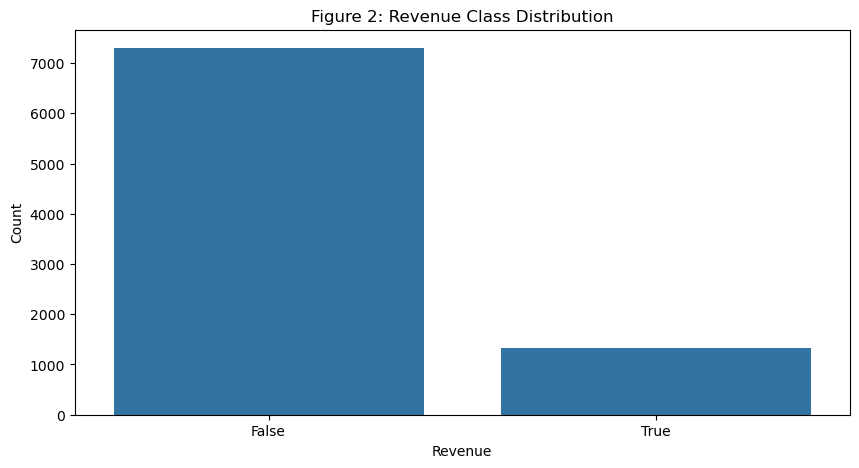

In [8]:
# plotting distribution of Revenue

plt.figure(figsize=(10, 5))
sns.countplot(data=train_data, x='Revenue')
plt.title('Figure 2: Revenue Class Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

Figure 2 shoes that there does seem to be some class imbalance in the Revenue feature. This might create bias in our models that may perform poorly on the 'True' Revenue cases as there were less examples to fit on.

To compare Revenue with other features, we will perform some feature engineering by creating the feature, Total Revenue, for each of the categorical revenues explored below.

#### Categorical Features: Examining the Distributions

Let us examine the distribution of certain categorical feature to better understand the user demographic.The distributions are:
* distribution of classes within the categorical feature
* distribution of Revenue=True across the different classes for a given feature

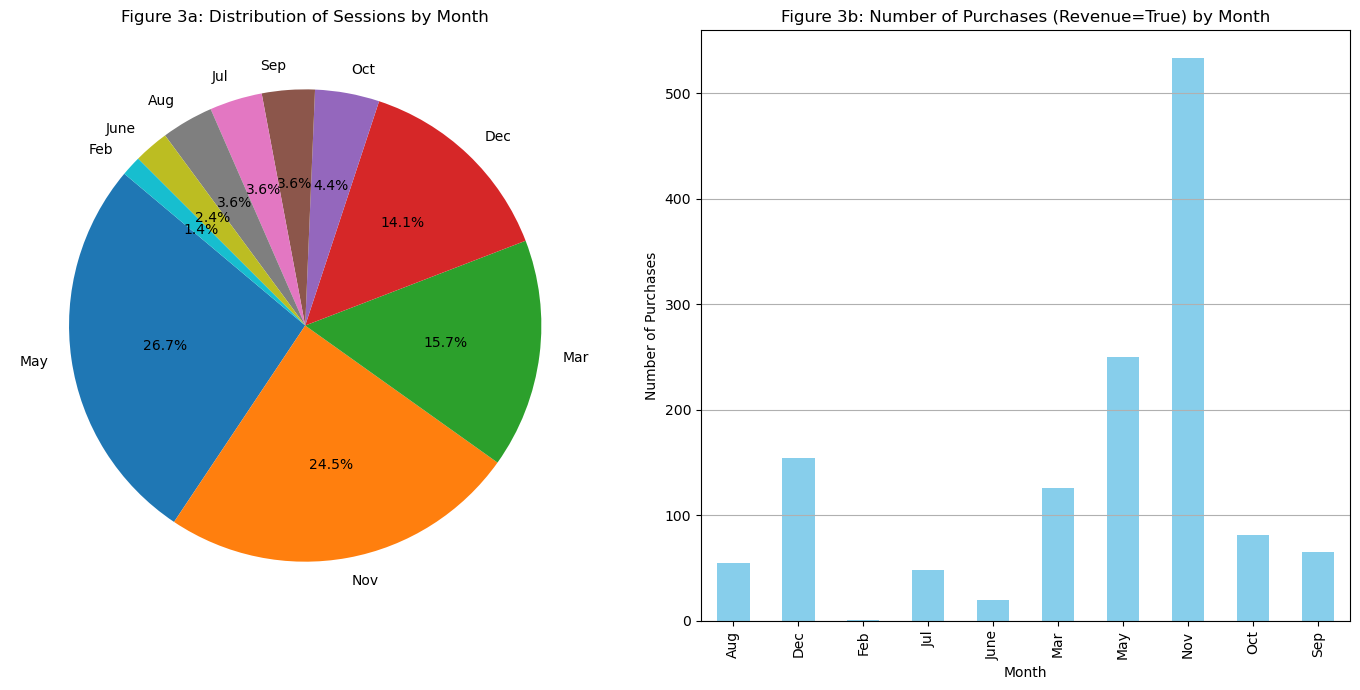

In [9]:
# Month distribtuion: pie chart and bar plot 

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Month pie plot
month_counts = train_data['Month'].value_counts()
axs[0].pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Figure 3a: Distribution of Sessions by Month')

# Month bar plot

# Obtaining summary statistics for Revenue and Month
revenue_true_per_month = train_data[train_data['Revenue'] == True].groupby('Month').size()

revenue_true_per_month.plot(kind='bar', color='skyblue')
axs[1].set_title('Figure 3b: Number of Purchases (Revenue=True) by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Purchases')
axs[1].grid(axis='y')


plt.tight_layout()
plt.show()


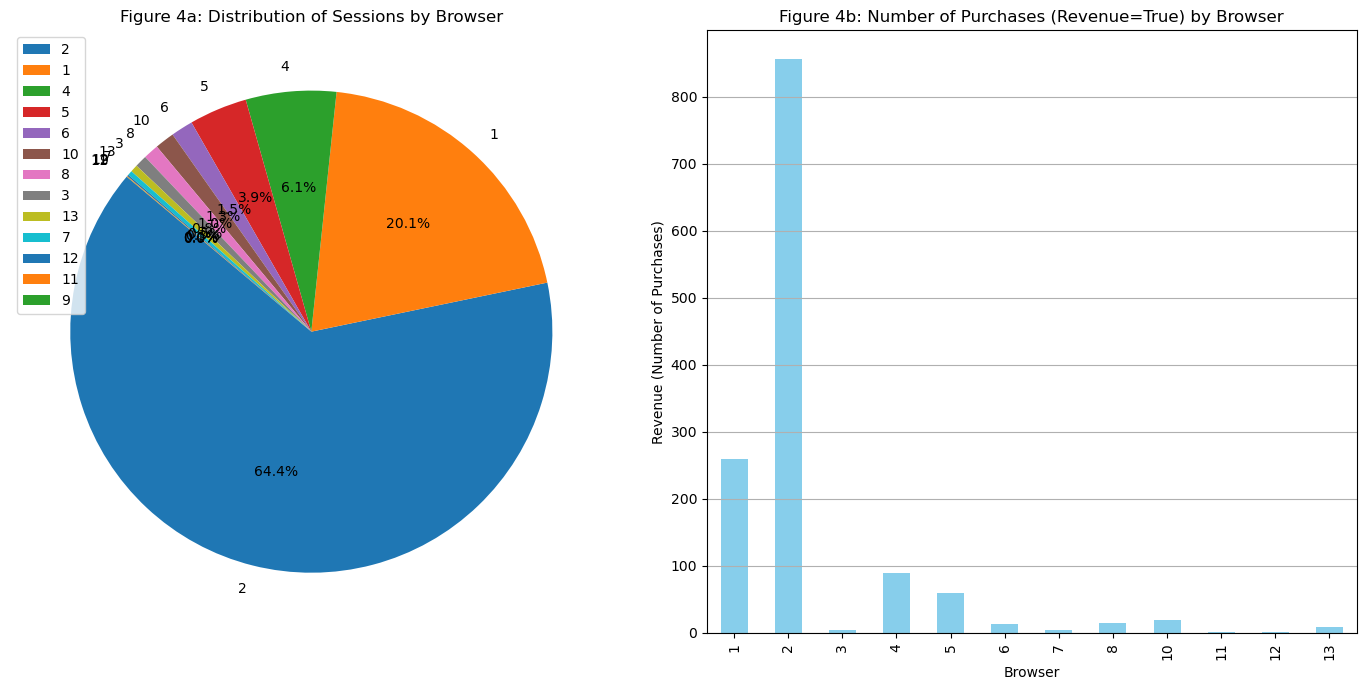

In [10]:
# Browser distribution: bar plot and pie plot

fig, axs = plt.subplots(1, 2, figsize=(14, 7))


# Browser pie plot
browser_counts = train_data['Browser'].value_counts()
axs[0].pie(browser_counts, labels=browser_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Figure 4a: Distribution of Sessions by Browser')
axs[0].legend()

# Browser bar plot

# Obtaining summary statistics for Revenue and Browser
revenue_true_browser= train_data[train_data['Revenue'] == True].groupby('Browser').size()

revenue_true_browser.plot(kind='bar', color='skyblue')
axs[1].set_title('Figure 4b: Number of Purchases (Revenue=True) by Browser')
axs[1].set_xlabel('Browser')
axs[1].set_ylabel('Revenue (Number of Purchases)')
axs[1].grid(axis='y')



plt.tight_layout()
plt.show()

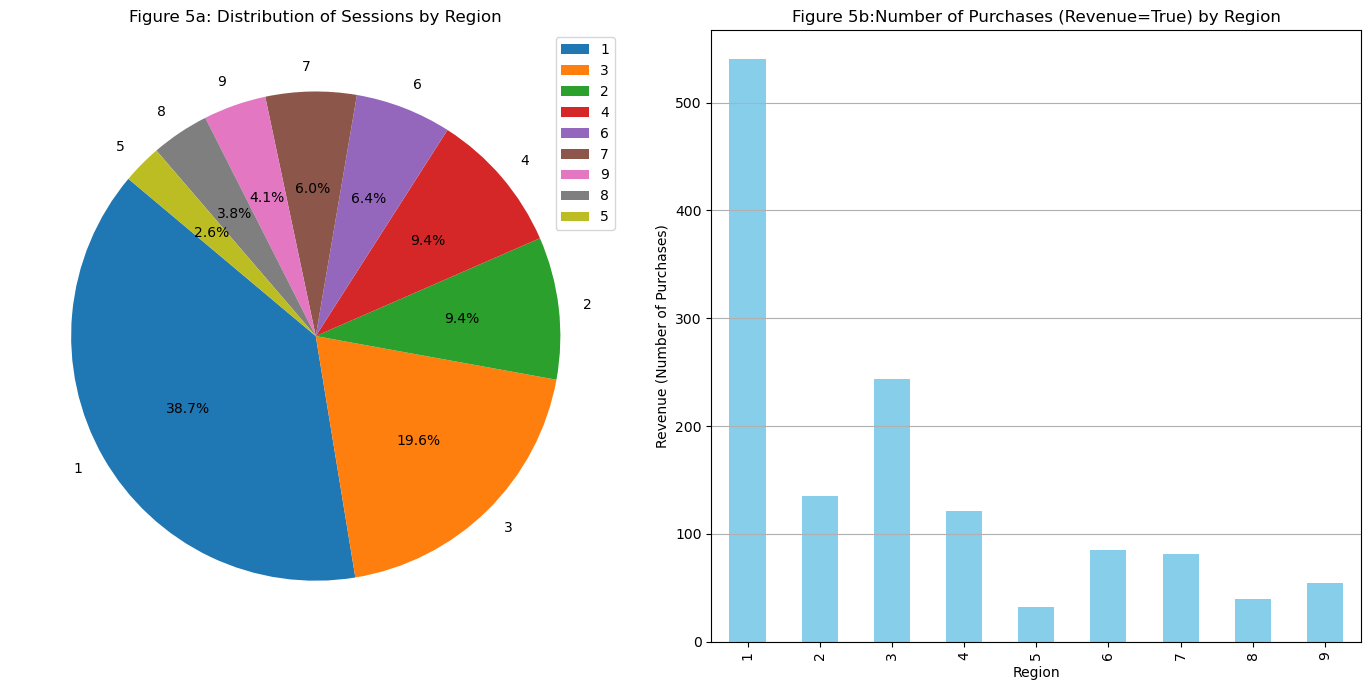

In [11]:
# Region distribution: bar plot and pie plot


fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Region pie plot
region_counts = train_data['Region'].value_counts()
axs[0].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Figure 5a: Distribution of Sessions by Region')
axs[0].legend()

# Region bar plot

# Obtaining summary statistics for Revenue and Region
revenue_true_region= train_data[train_data['Revenue'] == True].groupby('Region').size()


revenue_true_region.plot(kind='bar', color='skyblue')
axs[1].set_title('Figure 5b:Number of Purchases (Revenue=True) by Region')
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Revenue (Number of Purchases)')
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()


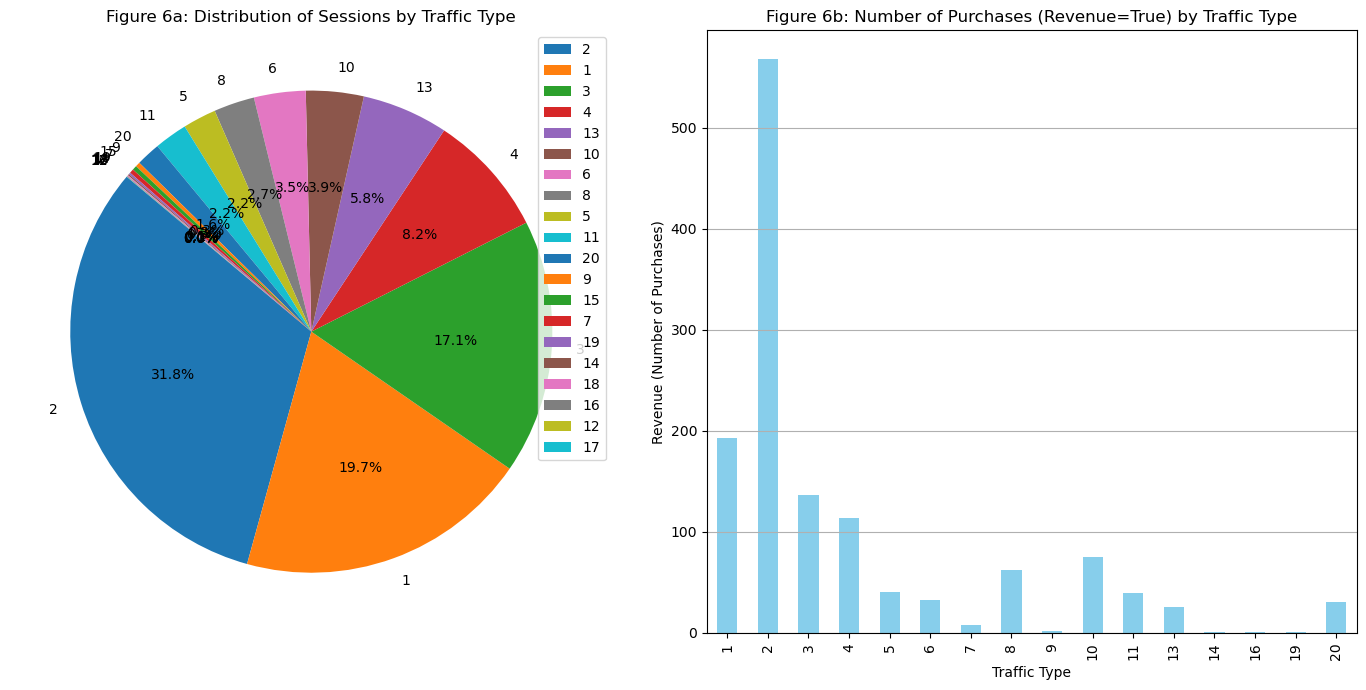

In [12]:
# Traffic Type distribution: bar plot and pie plot


fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Traffic Type pie plot
traffic_counts = train_data['TrafficType'].value_counts()
axs[0].pie(traffic_counts, labels=traffic_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Figure 6a: Distribution of Sessions by Traffic Type')
axs[0].legend()

# Traffic Type bar plot

# Obtaining summary statistics for Revenue and Traffic Type
revenue_true_per_month = train_data[train_data['Revenue'] == True].groupby('TrafficType').size()

revenue_true_per_month.plot(kind='bar', color='skyblue')
axs[1].set_title('Figure 6b: Number of Purchases (Revenue=True) by Traffic Type')
axs[1].set_xlabel('Traffic Type')
axs[1].set_ylabel('Revenue (Number of Purchases)')
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()



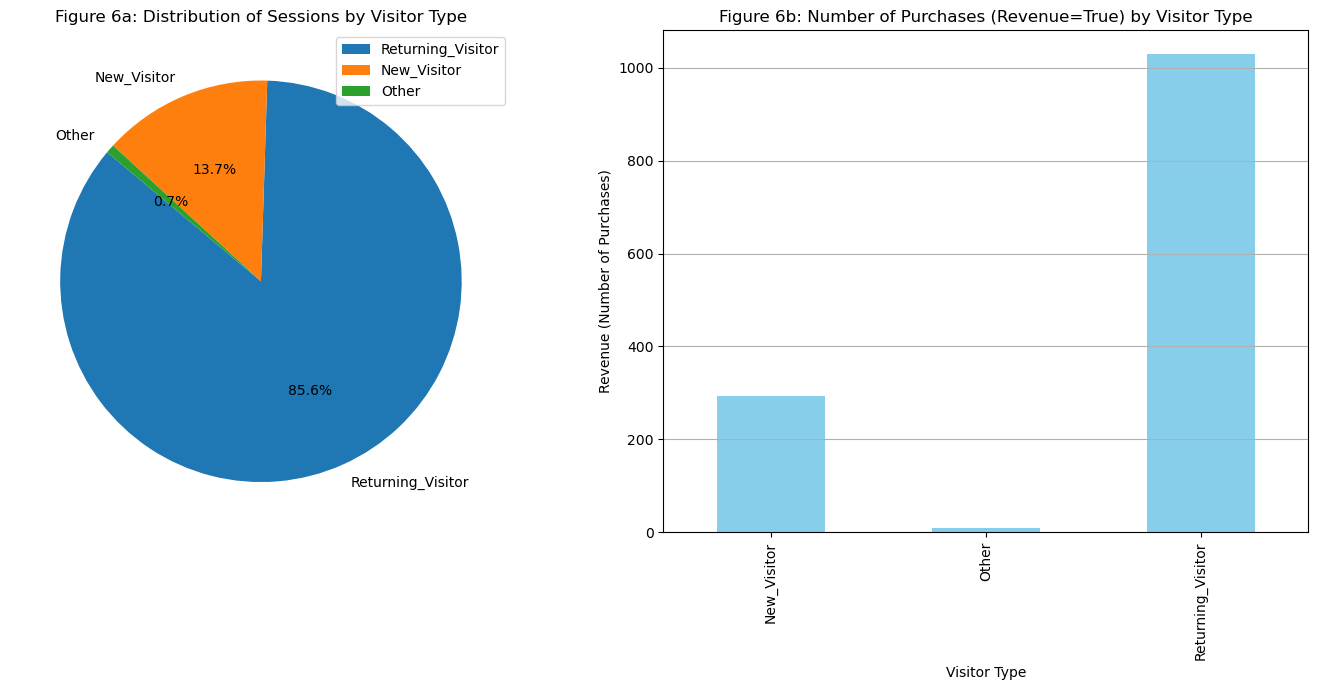

In [13]:
# Visitory Type distribution: bar plot and pie plot


fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Visitor Type pie plot
visitor_count = train_data['VisitorType'].value_counts()
axs[0].pie(visitor_count, labels=visitor_count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Figure 6a: Distribution of Sessions by Visitor Type')
axs[0].legend()

# Visitor Type bar plot

# Obtaining summary statistics for Revenue and Visitor Type
revenue_true_visitor = train_data[train_data['Revenue'] == True].groupby('VisitorType').size()

revenue_true_visitor.plot(kind='bar', color='skyblue')
axs[1].set_title('Figure 6b: Number of Purchases (Revenue=True) by Visitor Type')
axs[1].set_xlabel('Visitor Type')
axs[1].set_ylabel('Revenue (Number of Purchases)')
axs[1].grid(axis='y')



plt.tight_layout()
plt.show()



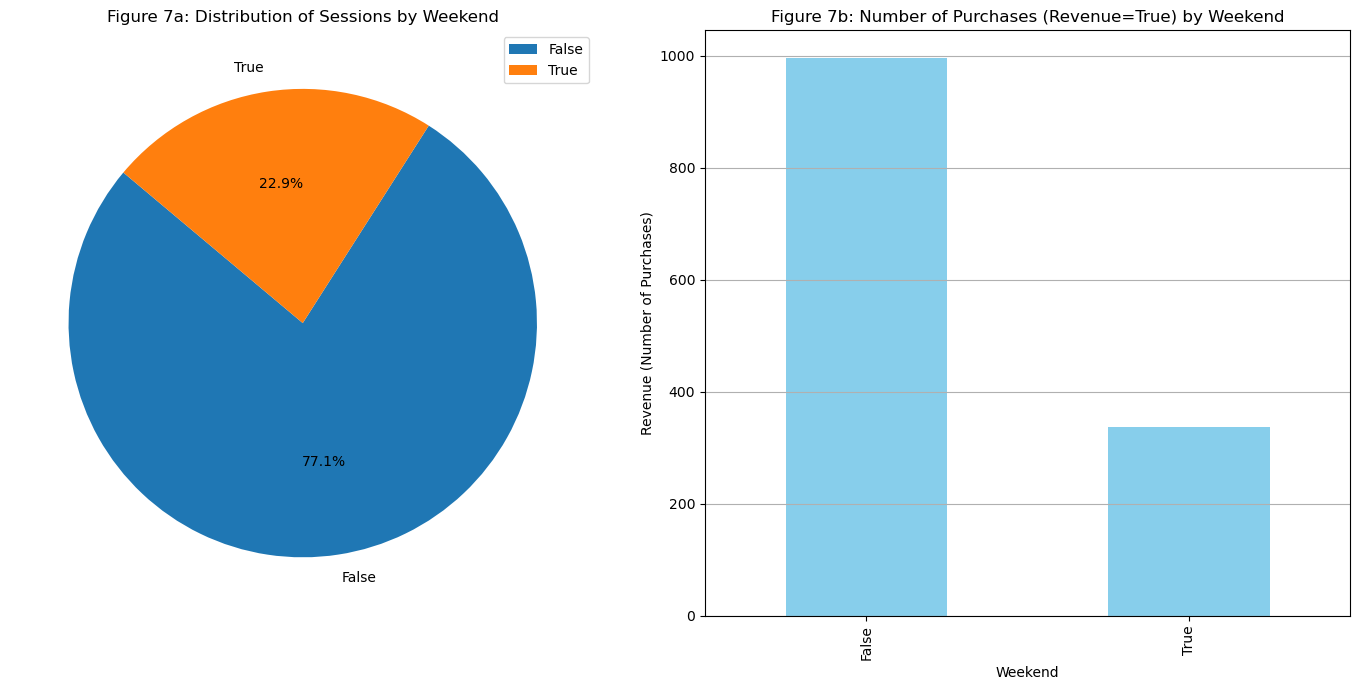

In [14]:
# Weekend distribution: bar plot and pie plot


fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Weekend pie plot
weekend_count = train_data['Weekend'].value_counts()
axs[0].pie(weekend_count, labels=weekend_count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Figure 7a: Distribution of Sessions by Weekend')
axs[0].legend()

# Weekend bar plot

# Obtaining summary statistics for Revenue and Weekend
revenue_true_visitor = train_data[train_data['Revenue'] == True].groupby('Weekend').size()

revenue_true_visitor.plot(kind='bar', color='skyblue')
axs[1].set_title('Figure 7b: Number of Purchases (Revenue=True) by Weekend')
axs[1].set_xlabel('Weekend')
axs[1].set_ylabel('Revenue (Number of Purchases)')
axs[1].grid(axis='y')



plt.tight_layout()
plt.show()




#### Continuous numerical Features: Correlation with Revenue

The remaining features are continuous numerical features. In order to understand their significance to the target feature, Revenue, we will make a correlation plot. To do this, we will create a copy of the original data, and modify it so that:
* Only the numerical features are kept
* Revenue is represented as a numerical feature so that it can be compared with the other numerical features

In [15]:
# converting Revenue to a numerical data type

data_numerical = train_data.copy()
data_numerical['Revenue'] = data_numerical['Revenue'].astype(int)

# defining list of numerical features
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational',
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                      'BounceRates', 'ExitRates', "PageValues", 'SpecialDay', 'Revenue'] # Revenue is not originally a numerical feature, but is included here because of the conversion above

data_numerical = data_numerical[numerical_features]

data_numerical.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
8077,0,0.0,0,0.0,5,81.083333,0.04,0.050000,0.0,0.0,0
1568,0,0.0,0,0.0,3,189.000000,0.00,0.066667,0.0,0.0,0
462,0,0.0,1,132.0,8,445.000000,0.00,0.014286,0.0,0.0,0
743,0,0.0,0,0.0,3,0.000000,0.20,0.200000,0.0,0.0,0
222,0,0.0,0,0.0,4,14.000000,0.10,0.150000,0.0,0.0,0


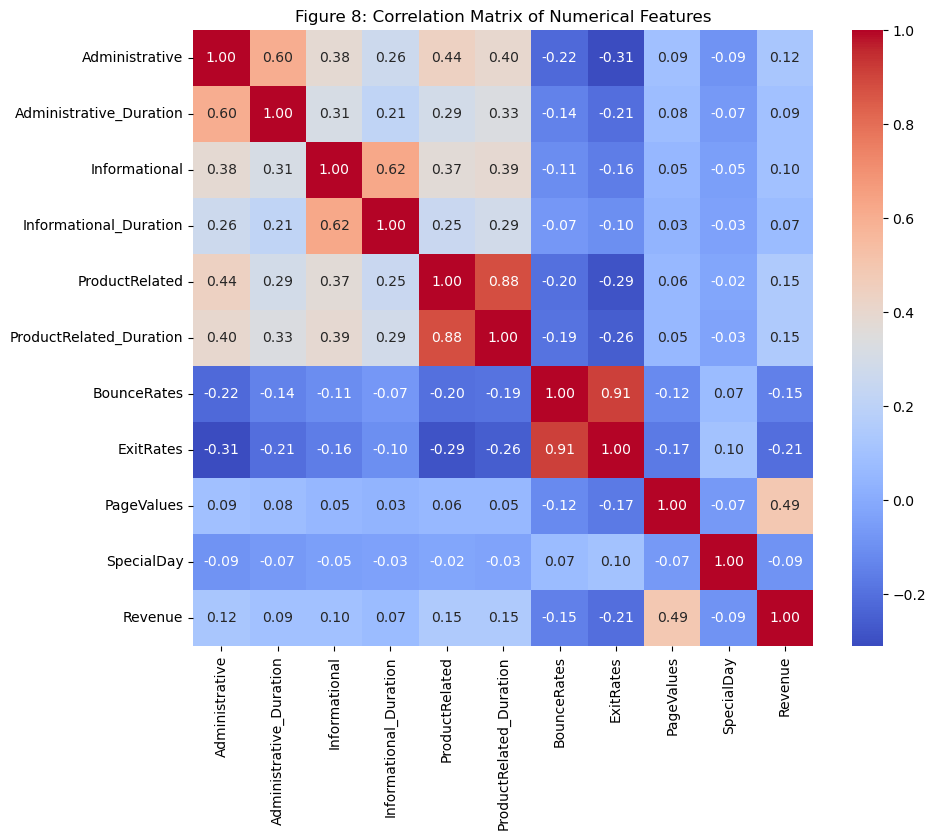

In [16]:
# making the correlation plot

# making the correlation plot
corr_matrix = data_numerical.corr()

# creating a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Figure 8: Correlation Matrix of Numerical Features')
plt.show()

From this visualization, we can see that the features most strongly correlated with Revenue are: PageValues, ProductRelated, and ProductRelated_Duration. It is important to note that the correlation matrix only represents linear correlations, between *pairs* of features. Some correlations may be confounded with other features, so while this matrix is a good starting point, it may not capture all relevant relationships.

## Methods

### Plan Summary
Given that we want to examine all explanatory variables, we will first examine the performance of several models to see which performs the best in predicting the target feature in the training set. Once that model is obtained, we will run it on our test set and perform SHAP analysis to gauge the explanatory variables' importance when predicting the target variable.

#### 1. Train-Test Split

A 70-30 split of our data has already been applied when loading the data, before performing any EDA: 
* 70% split for the training subset
* 30% split for the testing subset

All training of the models will be strictly conducted on the training set. The testing set will only be used once the model is finalized, and will only be deployed for scoring on the testing set once. This is to ensure that the model is not exposed to the testing set so that it does not 'learn' off of what it is trying to predict.

#### 2. Preprocessing and Transformations

Given that we have different data types, we will apply some transformations to each feature type depending on if the feature is numerical and continuous, discrete and categorical, binary, etc. The transformations will be detailed in Figure 9. 

#### 3. Training Models

Our target feature, Revenue, is binary so the models chosen will be trained to perform binary classification:

**3.1 Dummy Classifier Model**: 
The Dummy Classifier Model makes predictions that ignore the input features, in other words, it does not attempt to 'learn' anything from the data. This classifier serves as a baseline to compare to the following models. 

**3.2 kNN:** 

kNN is a simple cluster-based model. Given k, the number of nearest data points, the kNN classifier takes a data point and classifies it according to the the class of its k-nearest neighbours.


**3.3 SVM RBF:** 

Support Vector Machines with RBF Kernels act as weighted KNN's. Unlike KNN's, this model bases its decision boundary only on key examples, known as support vectors. The model transforms the input features into a higher dimensional space, generating a decision boundary based on a set of positive and negative examples and their weights along with their similarity measure. This model uses a kernel called RBFs as the similarity metric. 

**3.4 Random Forest Classifier:**

A Random Forest Classifier fits a series of decision tree classifiers on subsets of the given data. Each tree 'overfits' on a select feature, however the model uses averaging of individual trees to improve the predictive accuracy and therefore prevent overfitting. Given that there are many features in our dataset, this model is a strong candidate for our classification problem.


##### Evaluating the models
Each model will be evaluated on the following:
* fit time
* score time
* test score (this is the validation score, not the score from the actual test subset)
* train score

The model with the best (validation) test score will then be deployed **once** on the test data to obtain a final test score.

### 1. Train Test Split

**Note**: 

This is already performed in section: Loading the Data

In [17]:
# # train_data['Revenue'] = train_data['Revenue'].astype(int)
# # target = 'Revenue'
# # y_train = y_train.astype(int)
# y_train.head()


In [18]:
# # splitting original dataset: 30% for the test set, 70% for train set
# train_df, test_df = train_test_split(train_data, test_size=0.3, random_state=123)

# # creating X_train split
# X_train = train_df.drop(target, axis=1)

# # creating y_train split
# y_train = train_df[target]

# # creating X_test split
# X_test = test_df.drop(target, axis=1)

# # creating y_test split
# y_test = test_df[target]

### 2. Preprocessing and Transformations

**Figure 9: Summary of Transformations**
| **Feature** | **Transformation** | **Explanation**|
|-------------|--------------------|----------------|
| Administrative | scaling |standardize scale with other numerical features|
| Administrative_Duration | scaling |standardize scale with other numerical features |
| Informational | scaling |standardize scale with other numerical features |
| Informational_Duration | scaling |standardize scale with other numerical features |
| ProductRelated | scaling |standardize scale with other numerical features|
| ProductRelated_Duration | scaling |standardize scale with other numerical features |
| BounceRates | scaling |standardize scale with other numerical features|
| ExitRates | scaling |standardize scale with other numerical features|
| PageValues | scaling |standardize scale with other numerical features|
| SpecialDay | scaling |standardize scale with other numerical features |
| Month | one-hot encoding |categorical feature, need a numerical representation to pass through models|
| OperatingSystems | drop | justified in EDA, not relevant |
| Browser | n/a | would apply one-hot encoding but already represented in numerical form |
| Region | n/a | would apply one-hot encoding but already represented in numerical form |
| TrafficType | n/a | would apply one-hot encoding but already represented in numerical form |
| VisitorType | one-hot encoding | categorical feature, need a numerical representation to pass through models|
| Weekend | one-hot encoding with 'binary=True' | categorical feature, need a numerical representation to pass through models|
| Revenue | one-hot encoding with 'binary=True' | categorical feature, need a numerical representation to pass through models|

In [30]:
# y_train and y_test are transformed to numerical types here first as they cannot be included in the preprocessor

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [31]:
# defining the transformers

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output = False)
binary_transformer = OneHotEncoder(drop = 'if_binary', dtype = int)

# defining feature groups

numeric_features =  ['Administrative', 'Administrative_Duration', 'Informational',
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                      'BounceRates', 'ExitRates', "PageValues", 'SpecialDay']

categorical_features = ['Month', 'VisitorType']

passthrough_features = ['Browser', 'Region', 'TrafficType']

binary_features = ['Weekend']

# Operating system is dropped as it cannot be used/controlled by user or admin for the context of online shopping
drop_features = ['OperatingSystems']

In [32]:
# creating preprocessor with feature groups and transformers

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    (binary_transformer, binary_features), 
    ("passthrough", passthrough_features),
    ("drop", drop_features), 
)

### 3. Training Models

Let us define a custom function that returns the mean and standard deviation cross validation scores.

**Parameters**
* model :scikit-learn model
* X_train : numpy array or pandas DataFrame
    * X in the training data
* y_train :
    * y in the training data

**Returns**
* pandas Series with mean scores from cross_validation

**Note**: this function definition is taken from CPSC330 2023W1 Course Notes

In [33]:
# function for training models

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
   
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)


Let us create a dictionary to store the cross validation result summary for each model tested to allow for comparison. All results will be stored in this table for the training iterations.

In [34]:
# creating an empty dictionary
results_dict = {}

results_df = pd.DataFrame(results_dict).T
results_df

""


#### 3.1 Dummy Model

In [35]:
# defining dummy classifier model
dummy = DummyClassifier()

# defining dummy classifier pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)

# fitting dummy model and reporting results to the results_dict
results_dict["dummy"] = mean_std_cross_val_scores(
    dummy_pipe, X_train, y_train, cv=10, return_train_score=True
)

# viewing dummy classifier results 
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.017 (+/- 0.004),0.004 (+/- 0.005),0.846 (+/- 0.001),0.846 (+/- 0.000)


#### 3.2 KNN Model

In [36]:
import math
math.sqrt(len(y_test))

60.81940479813988

According to the square root of N rule, we must have 59 neighbors for our K value. This is a extremely high number and in order to increase the accuracy of our model, we will test out using cross validation to compare model accuracies to determine the best K-value.

In [37]:
knn_results = {}

# Range of k values to test
k_values = range(1, 59)

# Loop over each k value, create a kNN model, and perform cross-validation
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')
    knn_pipe = make_pipeline(preprocessor, knn_model)
    scores = cross_validate(knn_pipe, X_train, y_train, cv=10, return_train_score=True, scoring='accuracy')
    mean_score = scores['test_score'].mean()
    std_score = scores['test_score'].std()
    knn_results[k] = (mean_score, std_score)

# Convert the results dictionary to a DataFrame for easier analysis
knn_results_df = pd.DataFrame(knn_results, index=['mean_accuracy', 'std_accuracy']).T

# Find the k value with the highest mean accuracy
best_k = knn_results_df['mean_accuracy'].idxmax()
best_score = knn_results_df.loc[best_k, 'mean_accuracy']
best_std = knn_results_df.loc[best_k, 'std_accuracy']

print(f"Best k: {best_k} with mean accuracy: {best_score:.3f} (+/- {best_std:.3f})")

c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was pas

Best k: 13 with mean accuracy: 0.877 (+/- 0.009)


In [40]:
print(best_k)

13


Using the best_k value obtained, we will apply a KNeighboursClassifier model on our training data.

In [39]:
# Make the kNN model
kNN_model = KNeighborsClassifier(n_neighbors=best_k,p=2,metric='euclidean')

# defining kNN classifer pipeline
knn_pipe = make_pipeline(preprocessor, kNN_model)

# fitting kNN model and reporting results to the results_dict
results_dict["knn"] = mean_std_cross_val_scores(
    knn_pipe, X_train, y_train, cv=10, return_train_score=True
)

# viewing kNN classifier results 
results_df = pd.DataFrame(results_dict).T
results_df

c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was pas

,fit_time,score_time,test_score,train_score
dummy,0.017 (+/- 0.004),0.004 (+/- 0.005),0.846 (+/- 0.001),0.846 (+/- 0.000)
knn,0.015 (+/- 0.007),0.066 (+/- 0.014),0.877 (+/- 0.010),0.884 (+/- 0.001)


#### 3.3 SVM RBF

In [41]:
#defining SVM RBF classifier 
SVM = SVC(gamma = 0.01)

#defining SVM RBF pipeline 
svm_pipe = make_pipeline(preprocessor, SVM)

#fitting SVM model and appending results 
results_dict['SVM'] = mean_std_cross_val_scores(svm_pipe, X_train, y_train, cv = 10, return_train_score = True
                                               )
#displaying SVM RBF classifier results 
results_df = pd.DataFrame(results_dict).T
results_df

c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed w

,fit_time,score_time,test_score,train_score
dummy,0.017 (+/- 0.004),0.004 (+/- 0.005),0.846 (+/- 0.001),0.846 (+/- 0.000)
knn,0.015 (+/- 0.007),0.066 (+/- 0.014),0.877 (+/- 0.010),0.884 (+/- 0.001)
SVM,0.618 (+/- 0.035),0.112 (+/- 0.007),0.889 (+/- 0.008),0.891 (+/- 0.001)


#### 3.4 Random Forest Classifier

In [42]:
# defining a Random Forests Classifier
random_forest = RandomForestClassifier(n_estimators=50, max_depth = 50, random_state = 123)

# defining a pipeline that uses the Random Forest Classifier
randomfr_pipe = make_pipeline(preprocessor, random_forest) 

# fitting dummy model and reporting results to the results_dict
results_dict["random_forest"] = mean_std_cross_val_scores(
    randomfr_pipe, X_train, y_train, cv=10, return_train_score=True
)

# viewing dummy classifier results 
results_df = pd.DataFrame(results_dict).T
results_df

c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 

,fit_time,score_time,test_score,train_score
dummy,0.017 (+/- 0.004),0.004 (+/- 0.005),0.846 (+/- 0.001),0.846 (+/- 0.000)
knn,0.015 (+/- 0.007),0.066 (+/- 0.014),0.877 (+/- 0.010),0.884 (+/- 0.001)
SVM,0.618 (+/- 0.035),0.112 (+/- 0.007),0.889 (+/- 0.008),0.891 (+/- 0.001)
random_forest,0.369 (+/- 0.015),0.009 (+/- 0.006),0.903 (+/- 0.012),0.999 (+/- 0.000)


## Results

**Figure 10: Final Training Score Results**

In [43]:
results_df

,fit_time,score_time,test_score,train_score
dummy,0.017 (+/- 0.004),0.004 (+/- 0.005),0.846 (+/- 0.001),0.846 (+/- 0.000)
knn,0.015 (+/- 0.007),0.066 (+/- 0.014),0.877 (+/- 0.010),0.884 (+/- 0.001)
SVM,0.618 (+/- 0.035),0.112 (+/- 0.007),0.889 (+/- 0.008),0.891 (+/- 0.001)
random_forest,0.369 (+/- 0.015),0.009 (+/- 0.006),0.903 (+/- 0.012),0.999 (+/- 0.000)


### Model Selection

Among the many factors that data scientists consider for model selection, the two main factors we will consider are accuracy and efficiency.

#### Efficiency

Time efficiency and computational complexity are key factors to model selection. We want models that strike the best balance between getting the results we want and doing it in an efficient manner. KNN is known for its computational intensity, although not reflected in the fit times above, we can be concerned how it might performed on a larger scale. Similarly, we know that the SVM model struggles with computational efficiency and that is what our results reflected in the the fit time. The random forests model came out on top of the efficiency tables with the quickest fit time and scoring time while outperforming all other models in terms of score as well.

#### Performance

In assessing the accuracy of machine learning models, particularly in the context of comparing Random Forests, kNN, and SVM, it's essential to evaluate various metrics and considerations that provide an in-depth evaluation truly reflective of performance. Each of these models offers distinct approaches to classification and regression tasks, leading to variations in performance across different datasets and problem domains. In terms of our results, the clear winner is the random forest model.

### Determining Feature Importance
Now that we have a model that best learns and predicts on our training set, let us determine which features play the greatest importance. 


In [49]:
preprocessor = randomfr_pipe.named_steps['columntransformer']

# Initialize an empty list to hold feature names
transformed_feature_names = []

# Iterate over transformers in the ColumnTransformer
for transformer_name, transformer, original_features in preprocessor.transformers_[:-1]: # Skip the 'remainder' transformer
    if hasattr(transformer, 'get_feature_names_out'):  # For transformers with this method
        feature_names = transformer.get_feature_names_out(original_features)
    else:  # For transformers without `get_feature_names_out`, use the original feature names
        feature_names = original_features
    transformed_feature_names.extend(feature_names)

# Get feature importances from the RandomForestClassifier
rf_model = randomfr_pipe.named_steps['randomforestclassifier']
importances = rf_model.feature_importances_

# Match feature names with their importances
feature_importances = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the sorted feature importances
feature_importances_sorted

,Feature,Importance
0,PageValues,0.360841
1,ProductRelated_Duration,0.090507
2,ExitRates,0.088683
3,ProductRelated,0.075773
4,Administrative_Duration,0.057824
5,BounceRates,0.056434
6,Administrative,0.043353
7,TrafficType,0.032881
8,Region,0.032604
9,Informational_Duration,0.027768


These ranked importance scores indicate how much each feature is contributing to the Radnom Forests model. For categorical models which have been one-hot encoded, such as Month, the label is Month_[insert mont] for example Month_June. The values in this column represent teh relative importance of each feature, where a higher score indicates more importance. From this ranking, we can infer that the following features had high relative importance:
* PageValues
* ProductRelated_Duration 
* ExitRates
* ProductRelated
* Administrative_Duration

The rest of the variables gradually decrease, however it is worth nothing that the variable PageValues is significantly higher than all other features (by approximately 4 times), implying this is one of the most influential features when it comes to predicting user purchasing intent (represented by variable Revenue). 

#### Evaluating True Positive Rate, Precision Score

The accuracy score at face value seems to be good, however if we break down further our results by looking at our true positive rate (precision score), we can see that our model actually struggled and because of the class imbalance the effect of this on our score was not reflected in our accuracy. This analysis helps us tame our optimism and helps us insights into how well our model correctly identifies positive instances within the dataset, which is particularly crucial in scenarios with imbalanced classes. Understanding the nuances of class imbalances allows us to make informed decisions about model adjustments, such as implementing techniques like oversampling, undersampling, or adjusting class weights, to improve the model's predictive capability for minority classes. Moreover, it underscores the importance of considering multiple evaluation metrics beyond just accuracy, enabling a more comprehensive assessment of model effectiveness and guiding future iterations or refinements to enhance predictive performance across all classes.

c:\Users\sanas\miniconda3\envs\project_env\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Text(0.5, 1.0, 'Figure 11: Random Forests Confusion Matrix')

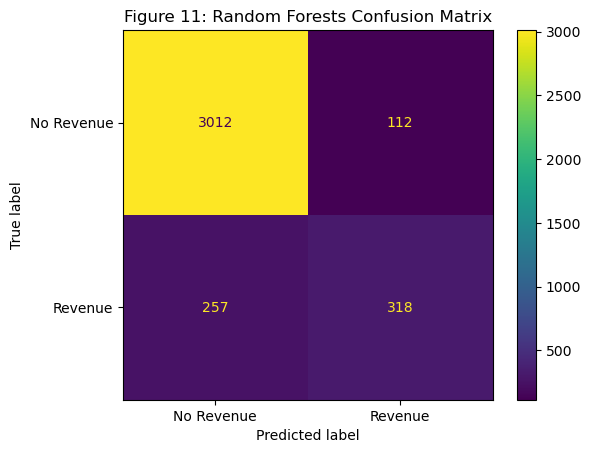

In [52]:
randomfr_pipe.fit(X_train, y_train)
randomfr_pipe.predict(X_test)
cm = ConfusionMatrixDisplay.from_estimator(
    randomfr_pipe, X_test, y_test, values_format="d", display_labels=["No Revenue", "Revenue"]
)

cm.ax_.set_title("Figure 11: Random Forests Confusion Matrix")

In [58]:
TP = cm.confusion_matrix[1,1]
FP = cm.confusion_matrix[1,0]
TN = cm.confusion_matrix[0,0]
FN = cm.confusion_matrix[0,1]

precision = TP / (TP + FP)
recall = TP/(TP + FN)
accuracy = (TP + TN)/(TP + FN + TN + FP)
f1 = (2* precision * recall)/(precision + recall)

# Creating a dictionary to hold the metrics
metrics = {
    "Metric": ["Precision", "Recall", "Accuracy", "F1 Score"],
    "Value": [precision, recall, accuracy, f1]
}

metrics_df = pd.DataFrame(metrics)

metrics_df

,Metric,Value
0,Precision,0.553043
1,Recall,0.739535
2,Accuracy,0.900243
3,F1 Score,0.632836


**Breakdwon of Metrics**
* **Precision**: the ratio of correctly predicted positive cases to the total number of predicted positive cases (true positives and false positives)
* **Recall**: the ratio of correctly predicted positive observations to the total number of positive cases (true positives and false negatives)
* **Accuracy**: the ratio of correctly predicted observations to the total number of observations. This metric may be misleading if classes are imbalanced
* **F1 Score**: the weighted average of precision and recall, this is a better measure for imbalanced classes compared to accuracy

Given that our f1 score is somewhat low, 63.28%, we can infer that the performance of our random forests model -- while not bad -- is affected by class imbalance. This is a limitation of our analysis.

#### Conclusion and Discussion

Restating the question: 

**Question**: Using all variables provided in the dataset, which group of explanatory variables form the best prediction for the user's purchase intent?

Our findings in regard to the question be summed up into 2 main points:
- When it comes to the application of ML to predict online consumer behaviour given all the explanatory variables in our dataset, the random forests model performs the best and produced the best results in terms of time and train/test scoring. The random forests model performed the best in terms of fit/score time and train/test score out of: a dummy model, SVM RBF model, kNN model and Random Forest Classifier.


- The following group of explanatory variables have the greatest feature importance in our chosen model when predicting the target feature, Revenue:
1. PageValues
2. ProductRelated_Duration 
3. ExitRates
4. ProductRelated
5. Administrative_Duration


##### Limitations
Once our best performing model, random forests, was fitted on the test data, we obtained the following peformance metrics: precision, accuracy, recall and f1 score. We decided to focus on f1 score, as we know from EDA that our dataset has class imbalance, and f1 score encompasses both precision and recall while being a better metric than accuracy when there is class imbalance. It was found that our f1 score was somewhat low, indicating that the random forest model's performance on the test set was not as good as its performance on the training set. This is indicative of the issue of class balance, as well as potential overfitting on the training set leading to poor generalization on unseen data.

# Citations

Gkikas, D. C., & Theodoridis, P. K. (2021). Ai in consumer behavior. Learning and Analytics in Intelligent Systems, 147–176. https://doi.org/10.1007/978-3-030-80571-5_10

Sakar, C. O., Polat, S. O., Katircioglu, M., & Kastro, Y. (2018). Real-time prediction of online shoppers’ purchasing intention using Multilayer Perceptron and LSTM recurrent neural networks. Neural Computing and Applications, 31(10), 6893–6908. https://doi.org/10.1007/s00521-018-3523-0 

Shaw N, Eschenbrenner B, Baier D. Online shopping continuance after COVID-19: A comparison of Canada, Germany and the United States. Journal of Retailing and Consumer Services. 2022 Nov;69:103100. doi: 10.1016/j.jretconser.2022.103100. Epub 2022 Aug 16. PMCID: PMC9379614.

Monteros, M. (2023, September 20). Big-box retailers continue to ramp up investments in store-based fulfillment. Retrieved from ModernRetail: https://www.modernretail.co/operations/big-box-retailers-continue-to-ramp-up-investments-in-store-based-fulfillment/

